In [1]:
import pandas
import matplotlib.pyplot
import seaborn

import espn_fantasy_rugby.team_selector

In [2]:
features = ['OPP', 'POS', 'SM']
target = 'MDP'

espn_data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

manager_data = pandas.read_csv('../data/manager_round_points.csv')
manager_data['TOTAL_POINTS'] = manager_data.groupby('MANAGER')['POINTS'].cumsum()

In [12]:
first_round_players = [
    'T Furlong',
    'R Best',
    'J George',
    'P Willemse',
    'M Itoje',
    'A Steyn',
    'J Tipuric',
    'B Vunipola',
    'C Murray',
    'J Sexton',
    'J Adams',
    'J Davies',
    'D Penaud',
    'S Hogg',
    'B Kinghorn'
]

In [13]:
initial_team = espn_fantasy_rugby.team_selector.get_initial_team(first_round_players, espn_data)

In [14]:
initial_team.sort_values('POS')

,NAME,TEAM,POS
4,J Tipuric,WAL,BR
7,A Steyn,ITA,BR
8,B Vunipola,ENG,BR
13,J Davies,WAL,C
14,D Penaud,FRA,C
2,J Sexton,IRE,FH
5,J George,ENG,FR
11,R Best,IRE,FR
12,T Furlong,IRE,FR
0,B Kinghorn,SCO,OB


In [15]:
team_each_round = espn_fantasy_rugby.team_selector.simulate_tournament(espn_data, initial_team, features, target)

Optimal
Optimal
Optimal
Optimal


In [16]:
team_each_round[team_each_round['ROUND']==2].sort_values('POS')

,NAME,TEAM,POS,MDP,PREDICTION,ROUND
0,A Steyn,ITA,BR,15,6.0,2
4,D Sisi,ITA,BR,3,6.0,2
14,S Negri,ITA,BR,4,6.0,2
7,H Jones,SCO,C,3,8.0,2
13,S Johnson,SCO,C,8,8.0,2
3,D Biggar,WAL,FH,7,8.0,2
2,D Bamba,FRA,FR,3,7.0,2
6,G Guirado,FRA,FR,3,7.0,2
11,J Poirot,FRA,FR,3,7.0,2
8,J Adams,WAL,OB,8,9.0,2


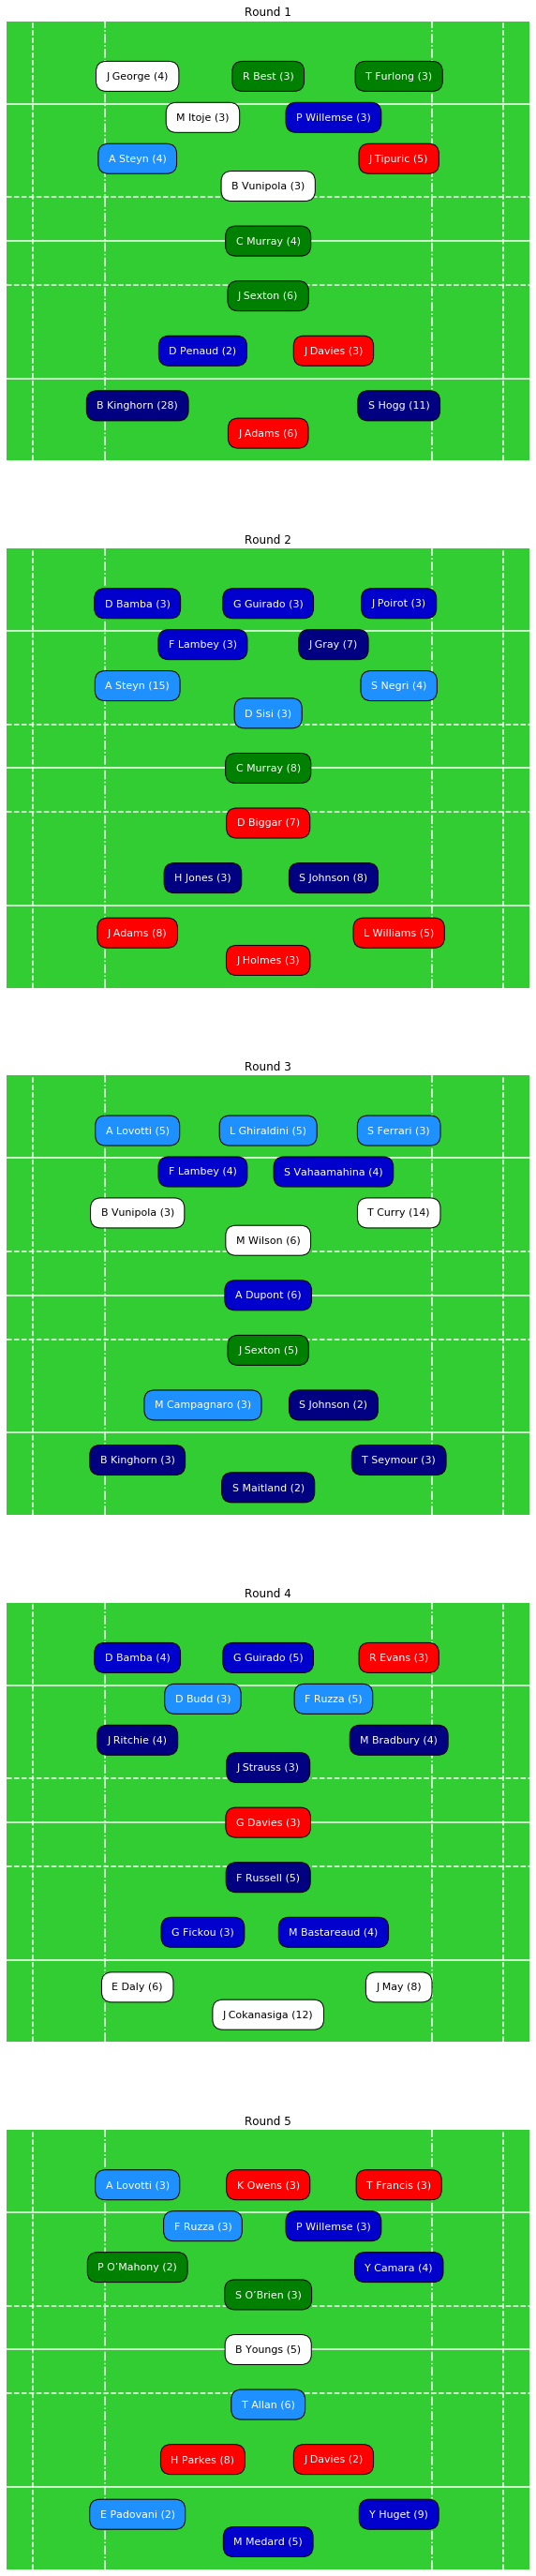

In [17]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,50), nrows=5, ncols=1)
for tournament_round in [1,2,3,4,5]:
    team_round = team_each_round[team_each_round['ROUND']==tournament_round]
    espn_fantasy_rugby.team_selector.show_team(team_round, ax[tournament_round-1])
    ax[tournament_round-1].set_title('Round {}'.format(tournament_round))
matplotlib.pyplot.show()

## How does the algorithm compare to other managers?

In [18]:
algorithm_results = pandas.DataFrame(
    team_each_round.groupby('ROUND')['MDP'].sum()
).reset_index()

algorithm_results['TOTAL_POINTS'] = algorithm_results['MDP'].cumsum()
algorithm_results

,ROUND,MDP,TOTAL_POINTS
0,1,88,88
1,2,83,171
2,3,68,239
3,4,72,311
4,5,61,372


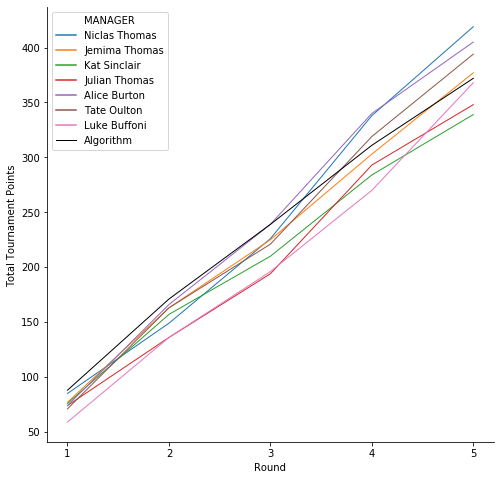

In [20]:
fig, ax = matplotlib.pyplot.subplots(figsize=(8,8))
seaborn.lineplot(
    data=manager_data,
    x='ROUND',
    y='TOTAL_POINTS',
    hue='MANAGER',
    **{
        'linewidth':1
    }
)
seaborn.lineplot(
    data=algorithm_results,
    x='ROUND',
    y='TOTAL_POINTS',
    **{
        'linewidth':1,
        'label':'Algorithm',
        'color':'black'
    }
)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Round')
ax.set_ylabel('Total Tournament Points ')
ax.legend()
seaborn.despine()
matplotlib.pyplot.show()